In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('merc_train.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_year_outlier
0,GLC Class,2019.000000,45299,Semi-Auto,2792.0,Diesel,145.0,40.4,2.0,1
1,unknown,2018.000000,19099,Semi-Auto,12321.0,Petrol,145.0,56.5,1.5,1
2,A Class,2019.000000,17702,Automatic,0.0,Diesel,145.0,68.9,1.5,1
3,unknown,2017.333333,21749,Semi-Auto,27178.0,Diesel,160.0,51.4,2.0,1
4,E Class,2018.000000,35950,Automatic,0.0,Diesel,0.0,42.8,3.0,1


In [ ]:
df_1 = df[['price', 'mileage', 'tax', 'mpg']]
df_1.describe()

,price,mileage,tax,mpg
count,9878.000000,9878.000000,9878.000000,9878.000000
mean,23977.823547,15406.251367,91.372748,55.928822
std,9700.322643,19573.638481,75.633088,9.038497
min,1495.000000,0.000000,0.000000,32.100000
25%,17399.000000,0.000000,0.000000,51.625000
50%,22299.500000,8290.500000,145.000000,56.500000
75%,28480.000000,24172.250000,145.000000,61.400000
max,134219.000000,166086.000000,580.000000,78.500000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_train = df[['mileage', 'tax', 'mpg']]
y_train = df['price']

X_train_s = scaler.fit_transform(X_train)
X_train_s

array([[-0.64448365,  0.70908075, -1.71816258],
       [-0.15763076,  0.70908075,  0.06319715],
       [-0.7871317 ,  0.70908075,  1.43517608],
       ...,
       [-0.7871317 , -0.94371871,  1.081117  ],
       [-0.7871317 ,  0.70908075,  1.43517608],
       [-0.71054523,  0.70908075, -1.9615782 ]])

In [ ]:
df_X_s = pd.DataFrame(X_train_s, columns=X_train.columns)
df_X_s.describe()

,mileage,tax,mpg
count,9.878000e+03,9.878000e+03,9.878000e+03
mean,-6.473866e-18,-8.919548e-17,-4.632411e-16
std,1.000051e+00,1.000051e+00,1.000051e+00
min,-7.871317e-01,-1.208167e+00,-2.636503e+00
25%,-7.871317e-01,-1.208167e+00,-4.761897e-01
50%,-3.635559e-01,7.090808e-01,6.319715e-02
75%,4.478698e-01,7.090808e-01,6.053501e-01
max,7.698486e+00,6.460823e+00,2.497353e+00


In [ ]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()

In [ ]:
%%timeit
lr1.fit(X_train, y_train)

The slowest run took 8.93 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 2.17 ms per loop


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lr1.predict(X_train)
mean_squared_error(y_train, y_pred)

63379059.24894533

In [ ]:
lr2 = LinearRegression()

In [ ]:
%%timeit
lr2.fit(df_X_s, y_train)

1000 loops, best of 5: 1.44 ms per loop


In [ ]:
y_pred = lr2.predict(df_X_s)
mean_squared_error(y_train, y_pred)

63379059.24894533

In [ ]:
for feature, coef in zip(X_train.columns, lr2.coef_):
  print(f'{feature}: {coef}')
print(f'Intercept: {lr2.intercept_}')

mileage: -3494.7856139558144
tax: 597.8373548402947
mpg: -3557.9956702618
Intercept: 23977.823547276777


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

X_train_mm = mmscaler.fit_transform(X_train)

lr3 = LinearRegression()

In [ ]:
%%timeit
lr3.fit(X_train_mm, y_train)

1000 loops, best of 5: 972 µs per loop


In [ ]:
y_pred = lr3.predict(X_train_mm)
mean_squared_error(y_train, y_pred)

63379059.24894533

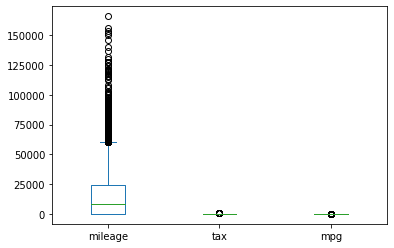

In [ ]:
X_train.plot(kind='box')

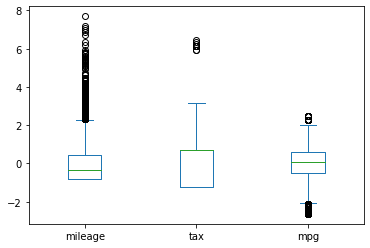

In [ ]:
df_X_s.plot(kind='box')